# European Options

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import yfinance as yf

In [36]:
S0 = 100
r = 0.05
sigma = 0.2
sampleX = np.random.normal(0,1,10000)

def S(X_i,T):
    return S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*X_i)

In [37]:
def vanillaPayoff(X_i,T,K):
    return max(0,S(X_i,T)-K)

In [38]:
def antitheticPayoff(X_i,T,K):
    return (max(0,S(X_i,T)-K)+max(0,S(-X_i,T)-K))/2

In [39]:
def getCk(X,T,K,payoff):
    total = 0
    for X_i in X:
        total += payoff(X_i,T,K)
    return np.exp(-r*T)*total/len(X)

In [40]:
def getStdError(X,T,K,Ck,payoff):
    total = 0
    for X_i in X:
        total += (np.exp(-r*T)*payoff(X_i,T,K)-Ck)**2
    return np.sqrt(total/(len(X)-1))/np.sqrt(len(X))

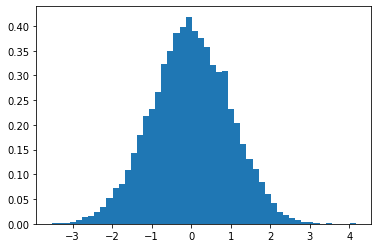

In [41]:
plt.hist(sampleX, 50, density=True)
plt.show()

In [42]:
Ts = [2,4,6,8]
Ks = [90,100,110]

for K in Ks:
    for T in Ts:
        Ck = getCk(sampleX,T,K,vanillaPayoff)
        antitheticCk = getCk(sampleX,T,K,antitheticPayoff)
        print("Simple: K =",K,"T =",T,"Ck =",Ck,"StdError =",getStdError(sampleX,T,K,Ck,vanillaPayoff))
        print("Antithetic: K =",K,"T =",T,"Ck =",antitheticCk,getStdError(sampleX,T,K,antitheticCk,antitheticPayoff))

Simple: K = 90 T = 2 Ck = 21.589395286643793 StdError = 0.24310620527595353
Antithetic: K = 90 T = 2 Ck = 21.91777538806189 0.09816624602327613
Simple: K = 90 T = 4 Ck = 29.960259333864478 StdError = 0.3597342484905666
Antithetic: K = 90 T = 4 Ck = 30.46091473136464 0.160027630483979
Simple: K = 90 T = 6 Ck = 36.88487859248319 StdError = 0.45903996059734303
Antithetic: K = 90 T = 6 Ck = 37.53406315197309 0.21504796143091082
Simple: K = 90 T = 8 Ck = 42.861198319271104 StdError = 0.5491154063986017
Antithetic: K = 90 T = 8 Ck = 43.646631193345875 0.26729407399389543
Simple: K = 100 T = 2 Ck = 15.703278825447077 StdError = 0.21794632655317184
Antithetic: K = 100 T = 2 Ck = 16.00325792175954 0.10925876585257527
Simple: K = 100 T = 4 Ck = 24.520623332560564 StdError = 0.3384467554423902
Antithetic: K = 100 T = 4 Ck = 25.002337660113724 0.17038054057841237
Simple: K = 100 T = 6 Ck = 31.84284788550276 StdError = 0.441048739965571
Antithetic: K = 100 T = 6 Ck = 32.47905239139333 0.22473441900

In [44]:
spy = yf.Ticker("SPY")
opt = spy.option_chain('2022-01-21')
print(opt)

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY220121C00115000 2022-01-19 15:25:14+00:00   115.0     341.91  339.19   
1    SPY220121C00120000 2022-01-18 20:28:26+00:00   120.0     333.11  334.20   
2    SPY220121C00125000 2021-12-16 20:10:54+00:00   125.0     340.56  339.87   
3    SPY220121C00130000 2021-12-23 14:40:21+00:00   130.0     340.33  324.57   
4    SPY220121C00135000 2021-12-16 21:05:46+00:00   135.0     331.96  329.87   
..                  ...                       ...     ...        ...     ...   
275  SPY220121C00605000 2021-12-06 19:11:15+00:00   605.0       0.01    0.00   
276  SPY220121C00610000 2021-12-06 14:52:19+00:00   610.0       0.01    0.00   
277  SPY220121C00615000 2021-11-09 14:30:05+00:00   615.0       0.01    0.00   
278  SPY220121C00620000 2022-01-07 14:48:25+00:00   620.0       0.01    0.00   
279  SPY220121C00625000 2022-01-19 15:43:28+00:00   625.0       0.01    0.00   

        ask  change  perc

# Asian Options

In [ ]:
def getArithmeticAsianCk(X,T,K,m):
    total = 0
    for X_i in X:
        S_list = []
        for j in range(m+1):
            S_list.append(S(X_i,j*T/m))
        total += max(0,np.mean(S_list)-K)
    return 

In [ ]:
ms = [10,20,50,100,200,500]
T = 1

for K in Ks:
    for m in ms:
        Ck = getArithmeticAsianCk(sampleX,T,K,m)
        print(Ck)
    


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
